In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from IPython.display import Image, display
from tensorflow.keras.preprocessing import image, sequence
from tensorflow.keras.layers import Dense, Convolution2D, Dropout,InputLayer,Add, LSTM,Input, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector, concatenate, Concatenate
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

In [0]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [3]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

94658560/94653016 [==============================] - 7s 0us/step


In [5]:
max_len = 40
from google.colab import files
files.upload()

{}

In [6]:
!ls

drive  sample_data


In [0]:
img = "/content/drive/My Drive/47871819_db55ac4699.jpg"

test_img = get_encoding(resnet, img)

In [4]:
from google.colab import drive
drive.mount("/content/drive")

with open("/content/drive/My Drive/word_to_index.p", "rb") as p1:
  word_2_indices = pickle.load(p1);
  
with open("/content/drive/My Drive/index_to_word.p", "rb") as p2:
  indices_2_word = pickle.load(p2);
  
print(word_2_indices)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'astonishment': 8253, 'snowpile': 1, 'crowded': 2, 'has': 3, 'ollie': 4, 'Guys': 5, 'phones': 6, 'scrolled': 7, 'closing': 8, 'possession': 9, 'punt': 10, 'squirrel': 11, 'Blurry': 12, 'Ever': 13, 'flute': 14, 'hanging': 15, 'large': 16, 'packages': 17, 'clipped': 18, 'story': 19, 'recording': 20, 'tend': 21, 'Russel': 22, 'loaves': 23, 'glassess': 24, 'medieval': 25, 'stance': 26, 'time': 27, 'white': 28, 'sunrise': 29, 'chess': 30, 'pyrotechnics': 31, 'plaza': 32, 'fiesty': 33, 'front': 34, 'protruding': 35, 'sides': 36, 'explosion': 37, 'doorway': 38, 'suggestive': 39, 'banner': 40, 'corridor': 41, 'riverbank': 42, 'retaining': 43, 'churns': 44, 'tourist': 45, 'sliding': 46, '4-wheeler': 47, 'grappling': 48, 'quickly': 49, 'rope': 50, 'lounges': 51, '157': 52, 'source': 53, 'kick': 54, 'corgi': 55, 'merchant': 56, 'rolls': 57, 'weights': 58, 'first': 59, 

In [12]:
model = load_model("/content/drive/My Drive/model_Image_Caption.h5")

W0713 06:55:32.214430 140524566374272 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0713 06:55:32.221006 140524566374272 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0713 06:55:32.222249 140524566374272 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init

In [0]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])
Argmax_Search = predict_captions(test_img)

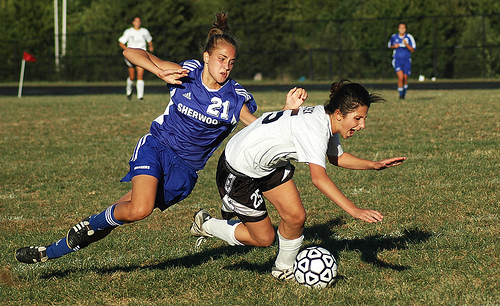

Two baseball players are running on the ball .


In [20]:
z = Image(filename=img)
display(z)

print (Argmax_Search)